<a href="https://colab.research.google.com/github/aurimas13/CodeAcademy-AI-Course/blob/main/Notebooks_Finished/Deep_Learning_5_Lecture_4_Demonstration_3_of_PyTorch_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Builing a Neural Network & Visualizsing it

Building a neural network model from scratch in PyTorch is easier than it sounds. 

We’ll build a model around the Iris dataset for two reasons:
+ **No data preparation is needed** — the dataset is simple to understand, clean, and ready for supervised machine learning classification.
+ **You don’t need a huge network to get accurate results** — which makes visualizing the network easier.

The code snippet below imports all Python libraries we’ll need for now and loads in the dataset:

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

iris = pd.read_csv('https://media.githubusercontent.com/media/aurimas13/CodeAcademy-AI-Course/main/Notebooks_In_Progress/Data/iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Because PyTorch can’t understand Pandas DataFrames, we’ll have to convert the dataset into a tensor format.

The features of the dataset can be passed straight into the `torch.tensor()` function, while the target variable requires some encoding (from string to integer):

In [ ]:
X = torch.tensor(iris.drop("variety", axis=1).values, dtype=torch.float)
y = torch.tensor(
    [0 if vty == "Setosa" else 1 if vty == "Versicolor" else 2 for vty in iris["variety"]], 
    dtype=torch.long
)

print(X[:3])
print()
print(y[:3])

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000]])

tensor([0, 0, 0])


And that’s it. The dataset is ready to be passed into a PyTorch neural network model. Now we'll build one next. It will have an input layer going from 4 features to 16 nodes, one hidden layer, and an output layer going from 16 nodes to 3 class probabilities:

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.input = nn.Linear(in_features=4, out_features=16)
        self.hidden_1 = nn.Linear(in_features=16, out_features=16)
        self.output = nn.Linear(in_features=16, out_features=3)
        
    def forward(self, x):
        x = F.relu(self.input(x))
        x = F.relu(self.hidden_1(x))
        return self.output(x)
    
    
model = Net()
print(model)

Net(
  (input): Linear(in_features=4, out_features=16, bias=True)
  (hidden_1): Linear(in_features=16, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=3, bias=True)
)


It’s easy to look at the summary of this model since there are only a couple of layers, but imagine you had a deep network with dozens of layers — all of the sudden, the summary would be too large to fit the screen.

Now we’ll explore the first way to visualize PyTorch neural networks, and that is with the Torchviz library:

# <b> Torchviz: Visualize PyTorch Neural Networks With a Single Function Call <b>

Torchviz is a Python package used to create visualizations of PyTorch execution graphs and traces. It depends on Graphviz, which is a dependency you’ll have to install it system-wide. 

In [ ]:
%conda install -c conda-forge graphviz
%pip install torchviz

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


To use Torchviz in Python, you’ll have to import the `make_dot()` function, make an instance of your neural network class, and calculate prediction probabilities of the entire training set or a batch of samples.

In [ ]:
from torchviz import make_dot

model = Net()
y = model(X)

That’s all you need to visualize the network. Simply pass the average of the probability tensor alongside the model parameters to the `make_dot()` function:

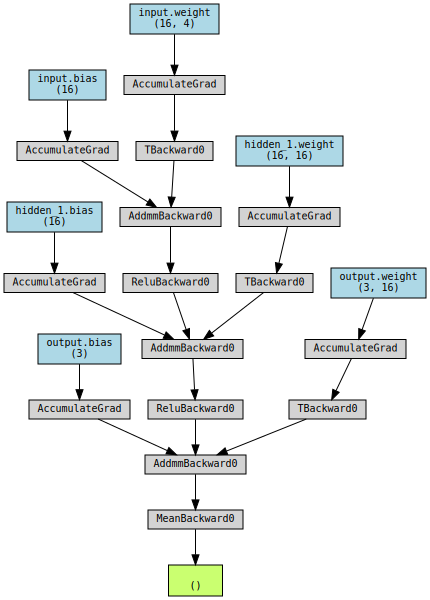

In [ ]:
make_dot(y.mean(), params=dict(model.named_parameters()))

You can also see what autograd saves for the backward pass by specifying two additional parameters: `show_attrs=True` and `show_saved=True`:

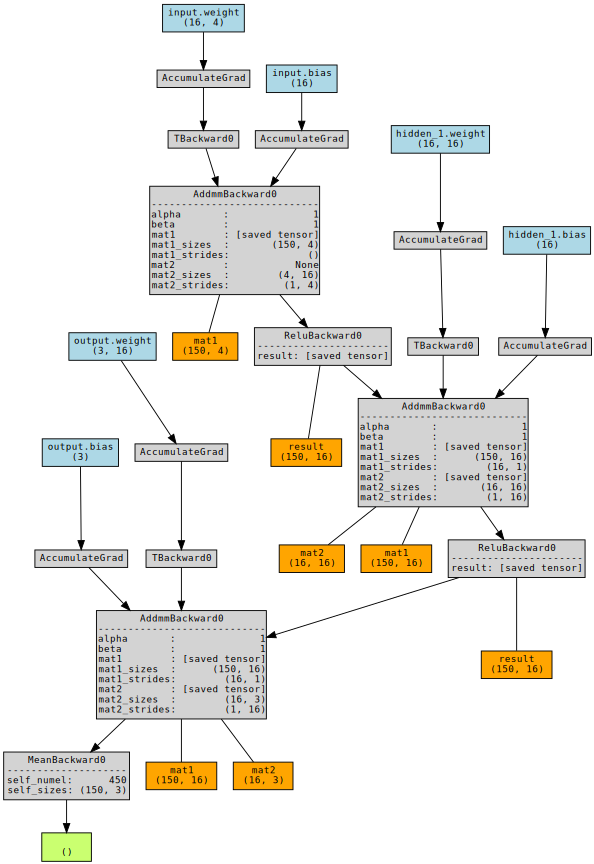

In [ ]:
make_dot(y.mean(), params=dict(model.named_parameters()), show_attrs=True, show_saved=True)

Now let’s explore another way to visualize PyTorch neural networks which Tensorflow users will find familiar. It's with TensorBoard.

## <b> Tensorboard: Visualize Machine Learning Workflow and Graphs <b>
    
TensorBoard is a visualization and tooling framework needed for machine learning experimentations. It has many features useful to deep learning researchers and practitioners, one of them being visualizing the model graph.

But first, make sure to install TensorBoard through pip:

In [ ]:
%pip install tensorboard

Note: you may need to restart the kernel to use updated packages.


So, how can you connect the PyTorch model with TensorBoard? You’ll need to take advantage of the `SummaryWriter` class from PyTorch, and add a network graph to a log directory (In our example, the logs will be saved to the torchlogs/ folder):

In [ ]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter("torchlogs/")
model = Net()
writer.add_graph(model, X)
writer.close()

Once the network graph is saved, navigate to the log directory from the shell and launch TensorBoard:

`cd <path-to-logs-dir> 
tensorboard --logdir=torchlogs`

You’ll be able to see the model graph on http://localhost:XXXX where XXXX represents what is written in your machine. You can click on any graph element and TensorBoard will expand it for you that should look like:


![Screenshot 2023-01-12 at 08.52.12.png](attachment:11b756e2-843a-4020-81b3-e302ef934ab5.png)

## <b> Conclusion on how to visualize PyTorch Neural Networks </b>

If you want to understand what’s going on in a neural network model, visualizing the network graph is the way to go. Sure, you need to actually understand why the network is constructed the way it is, but that’s a fundamental deep learning knowledge all ML practiners have.

Maximize the benefits of your ML projects with templates using PyTorch.

We’ve explored two ways to visualize neural network models from PyTorch — with Torchviz and TensorBoard. Both are excellent, and there’s no way to pick a winner. It's for you to decide which you prefer.


# <b> END OF DEMONSTRATION ABOUT VISUALSING NEURAL NETWORKS WITH PYTORCH